## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("Ly Data/wu_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '秉叡', '列席', '官員', '同仁', '稅法', '原則', '租稅', '法定', '主義', '財政部', '部長', '部長', '盛和', '委員', '委員', '秉叡', '法律', '前提', '法律', '施行', '溯及既往', '部長', '盛和', '委員', '秉叡', '財產權', '預期', '利益', '財產權', '法律', '解釋', '小孩子', '父母親', '財產', '擁有', '繼承權', '發生', '將來', '公司', '營業', '所得稅', '稅率', '繳完', '營所稅', '分配', '盈餘', '繳交', '保留稅', '法律', '繳交完', '相關', '稅金', '公司', '盈餘', '分配給', '設籍', '臺灣', '股東', '抵繳', '所得稅', '權利', '請問', '部長', '盛和', '委員', '秉叡', '會期', '修訂', '相關', '法律', '繳交', '營所稅', '保留', '盈餘', '預繳', '稅款', '將來', '分配', '盈餘', '設籍', '臺灣', '股東', '抵繳', '所得稅', '部長', '盛和', '委員', '秉叡', '修正', '溯及', '部長', '盛和', '分配', '委員', '秉叡', '公司', '公司', '民國', '保留', '盈餘', '分配', '稅款', '假定', '代表', '將來', '繳交', '所得稅', '抵繳', '權利', '部長', '盛和', '委員', '秉叡', '法律', '修訂', '生效', '公司', '剩餘', '分配', '抵繳', '所得稅', '部長', '盛和', '分配', '抵繳', '內含', '稅額', '委員', '秉叡', '部長', '部長', '盛和', '委員', '抵繳', '內含', '包括', '委員', '秉叡', '繳稅', '法律', '抵繳', '所得稅', '權利', '依法', '辦理', '保留', '盈餘', '不一定', '分配', '民國', '分配', '抵繳', '抵繳', '總額', '抵繳', '一半', '部長', '盛和', '抵繳', '一半',

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(15341 unique tokens: ['一半', '上下其手', '上限', '不一定', '不停']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 6), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 2), (26, 2), (27, 1), (28, 1), (29, 2), (30, 1), (31, 15), (32, 1), (33, 1), (34, 1), (35, 13), (36, 1), (37, 2), (38, 2), (39, 2), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 17), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 2), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 3), (85, 6), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 2), (95, 1), (96, 7), (97, 1), (98, 14), (99, 2), (100, 1), (101, 3), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 2), (108, 1), 

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/wu_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.07168654919557842), ('秉叡', 0.045310276896136585), ('報告', 0.023749589580825216), ('審查', 0.017948998577213528), ('委員會', 0.01751121812411076), ('評估', 0.017182882784283683), ('提出', 0.013352303819634453), ('意見', 0.012805078253255992), ('媒體', 0.011272846667396301), ('時間', 0.01072562110101784), ('國家', 0.010616175987742147), ('會議', 0.010397285761190762), ('總統', 0.01028784064791507), ('參加', 0.010178395534639378), ('立法院', 0.009959505308087993), ('討論', 0.008865054175331072), ('報導', 0.008646163948779687), ('工作', 0.008646163948779687), ('第一', 0.008646163948779687), ('行政院', 0.008646163948779687)]

strTM =  1[('委員', 0.05777560856567628), ('秉叡', 0.04844121774144348), ('預算', 0.03611738148984198), ('主計', 0.034714172411689344), ('政府', 0.02403758159965835), ('澤民', 0.023549508876822646), ('審計長', 0.01860777255811116), ('年度', 0.012933927155146116), ('編列', 0.011347690805930084), ('基金', 0.011103654444512232), ('慶隆', 0.010859618083094382), ('地方', 0.010737599902385455), ('財政', 0.0100664999084


 Coherence Score:  0.4697168369016362


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.3717295825916498
Num_topics:  6  Coherence Score=  0.4366649149669579
Num_topics:  9  Coherence Score=  0.4678787778115342
Num_topics:  12  Coherence Score=  0.44231592254681534
Num_topics:  15  Coherence Score=  0.4825479372169801
Num_topics:  18  Coherence Score=  0.48558654791317873
Num_topics:  21  Coherence Score=  0.47343727567376853
Num_topics:  24  Coherence Score=  0.4717684977912942
Num_topics:  27  Coherence Score=  0.47963778766465937
Num_topics:  30  Coherence Score=  0.47102639180043254
Num_topics:  33  Coherence Score=  0.4651745680895462


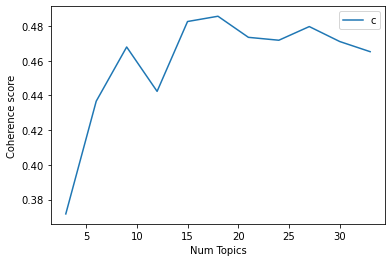

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.3717
Num Topics = 6  has Coherence Value of 0.4367
Num Topics = 9  has Coherence Value of 0.4679
Num Topics = 12  has Coherence Value of 0.4423
Num Topics = 15  has Coherence Value of 0.4825
Num Topics = 18  has Coherence Value of 0.4856
Num Topics = 21  has Coherence Value of 0.4734
Num Topics = 24  has Coherence Value of 0.4718
Num Topics = 27  has Coherence Value of 0.4796
Num Topics = 30  has Coherence Value of 0.471
Num Topics = 33  has Coherence Value of 0.4652
Optimal Topic Num = 18  Highest Value = 0.48558654791317873


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.071*"臺灣" + 0.020*"美國" + 0.020*"國家" + 0.016*"投資" + 0.013*"產業" + 0.012*"中國" '
  '+ 0.012*"政策" + 0.011*"國內" + 0.011*"機會" + 0.010*"政府" + 0.010*"發展" + '
  '0.009*"影響" + 0.008*"廠商" + 0.008*"國際" + 0.008*"困難" + 0.008*"目前" + 0.008*"台灣" '
  '+ 0.008*"提到" + 0.008*"第一" + 0.008*"外國" + 0.008*"經濟" + 0.007*"世界" + '
  '0.007*"市場" + 0.007*"資金" + 0.006*"合作"'),
 (1,
  '0.028*"委員" + 0.025*"秉叡" + 0.021*"法律" + 0.014*"修正" + 0.011*"目的" + 0.010*"事業" '
  '+ 0.009*"同仁" + 0.009*"條例" + 0.008*"工作" + 0.008*"社會" + 0.008*"規範" + '
  '0.007*"照顧" + 0.007*"勞工" + 0.007*"長照" + 0.007*"醫院" + 0.006*"獎金" + 0.006*"相關" '
  '+ 0.006*"制度" + 0.006*"提案" + 0.006*"團體" + 0.006*"關係" + 0.006*"討論" + '
  '0.005*"將來" + 0.005*"反對" + 0.005*"本席"'),
 (2,
  '0.077*"主任委員" + 0.058*"委員" + 0.040*"秉叡" + 0.038*"銘宗" + 0.026*"銀行" + '
  '0.026*"金融" + 0.023*"金管會" + 0.019*"公司" + 0.014*"局長" + 0.013*"trf" + '
  '0.012*"主委" + 0.011*"商品" + 0.008*"發生" + 0.008*"瑞倉" + 0.007*"仲裁" + 0.007*"契約" '
  '+ 0.007*"評議" + 0.006*"陳情" + 0.006*"風險" + 0.006*"機構" + 0.006

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.3124,"部長, 虞哲, 委員, 秉叡, 稅率, 所得, 所得稅, 方案, 盈餘, 課稅","[委員, 秉叡, 列席, 官員, 同仁, 稅法, 原則, 租稅, 法定, 主義, 財政部, ..."
1,1,5.0,0.5656,"秉叡, 委員, 總裁, 投資, 臺灣, 美國, 影響, 經濟, 金龍, 淮南","[委員, 秉叡, 列席, 官員, 同仁, 中央銀行, 總裁, 答復, 中央銀行, 總裁, 答..."
2,2,2.0,0.4237,"主任委員, 銘宗, 委員, 秉叡, 公司, 瑞倉, 主委, 本席, 金管會, 贊成","[委員, 秉叡, 列席, 官員, 同仁, 主委, 公司, 第一百九十八, 股東會, 選任, ..."
3,3,9.0,0.5731,"中國, 銀行, 委員, 台灣, 秉叡, 風險, 公司, 企業, 分行, 大陸","[委員, 秉叡, 列席, 官員, 同仁, 最近, 中國, 企業, 美國, 華爾街, 上市, ..."
4,4,0.0,0.3739,"委員, 秉叡, 報告, 審查, 委員會, 評估, 提出, 意見, 媒體, 時間","[委員, 秉叡, 列席, 官員, 同仁, 審計長, 昨天, 立法院, 答詢, 台大, 醫院,..."
5,5,0.0,0.2725,"委員, 秉叡, 報告, 審查, 委員會, 評估, 提出, 意見, 媒體, 時間","[委員, 秉叡, 同仁, 慣例, 預算, 審查, 會期, 預算, 審查, 預算, 決算, 審..."
6,6,19.0,0.5260,"委員, 秉叡, 法律, 法官, 訴訟, 法院, 司法, 檢察官, 制度, 主義","[委員, 秉叡, 列席, 官員, 同仁, 核能, 一號, 運轉, 機體, 裡面, 燃料, 棒..."
7,7,4.0,0.4062,"院長, 行政院, 國民黨, 政策, 行政, 國家, 立法院, 意見, 法案, 支持","[委員, 煌瑯, 行政院, 院長, 部會, 首長, 同仁, 院長, 昨天, 國民黨, 黨團,..."
8,8,1.0,0.3327,"委員, 秉叡, 預算, 主計, 政府, 澤民, 審計長, 年度, 編列, 基金","[委員, 秉叡, 發言, 委員, 秉叡, 列席, 官員, 同仁, 主計, 財政部, 預算, ..."
9,9,9.0,0.5960,"中國, 銀行, 委員, 台灣, 秉叡, 風險, 公司, 企業, 分行, 大陸","[委員, 秉叡, 發言, 委員, 秉叡, 列席, 官員, 同仁, 金管會, 報告, 強化, ..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6270,"委員, 秉叡, 報告, 審查, 委員會, 評估, 提出, 意見, 媒體, 時間","[委員, 秉叡, 行政院, 院長, 副院長, 部會, 首長, 同仁, 院長, 高雄, 台南,..."
1,1.0,0.7627,"委員, 秉叡, 預算, 主計, 政府, 澤民, 審計長, 年度, 編列, 基金","[委員, 秉叡, 列席, 官員, 同仁, 媒體, 報導, 公務人員, 人力, 素質, 統計,..."
2,2.0,0.6962,"主任委員, 銘宗, 委員, 秉叡, 公司, 瑞倉, 主委, 本席, 金管會, 贊成","[委員, 秉叡, 列席, 官員, 同仁, 主委, 修法, 爭議, 由來已久, 印象, 澎湖,..."
3,3.0,0.6373,"委員, 秉叡, 土地, 署長, 政府, 部長, 公司, 虞哲, 財政部, 公告","[委員, 秉叡, 列席, 官員, 同仁, 本席, 請問, 部長, 財政部, 景美, 財政, ..."
4,4.0,0.6191,"院長, 行政院, 國民黨, 政策, 行政, 國家, 立法院, 意見, 法案, 支持","[委員, 秉叡, 學者, 專家, 同仁, 討論, 修憲, 代表, 目前, 憲法, 窒礙, 難..."
5,5.0,0.7381,"秉叡, 委員, 總裁, 投資, 臺灣, 美國, 影響, 經濟, 金龍, 淮南","[委員, 秉叡, 列席, 官員, 同仁, 請教, 央行, 總裁, 武漢, 肺炎, 疫情, 目..."
6,6.0,0.6983,"銀行, 委員, 秉叡, 董事長, 貸款, 公股, 臺銀, 員工, 政策, 公司","[委員, 秉叡, 列席, 官員, 同仁, 資本, 適足率, 民國, 監理, 標準, 台銀, ..."
7,7.0,0.7569,"部長, 虞哲, 委員, 秉叡, 稅率, 所得, 所得稅, 方案, 盈餘, 課稅","[委員, 秉叡, 列席, 官員, 同仁, 部長, 財政部, 提出, 報告, 名稱, 我國, ..."
8,8.0,0.6394,"次長, 委員, 秉叡, 政府, 地方, 補助, 經濟部, 目前, 方式, 觀光","[委員, 秉叡, 列席, 官員, 同仁, 臺北, 高雄, 街頭, 遊行, 次長, 經濟部, ..."
9,9.0,0.5960,"中國, 銀行, 委員, 台灣, 秉叡, 風險, 公司, 企業, 分行, 大陸","[委員, 秉叡, 發言, 委員, 秉叡, 列席, 官員, 同仁, 金管會, 報告, 強化, ..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,7.0,"部長, 虞哲, 委員, 秉叡, 稅率, 所得, 所得稅, 方案, 盈餘, 課稅",11.0,0.0298
1.0,5.0,"秉叡, 委員, 總裁, 投資, 臺灣, 美國, 影響, 經濟, 金龍, 淮南",40.0,0.1084
2.0,2.0,"主任委員, 銘宗, 委員, 秉叡, 公司, 瑞倉, 主委, 本席, 金管會, 贊成",13.0,0.0352
3.0,9.0,"中國, 銀行, 委員, 台灣, 秉叡, 風險, 公司, 企業, 分行, 大陸",21.0,0.0569
4.0,0.0,"委員, 秉叡, 報告, 審查, 委員會, 評估, 提出, 意見, 媒體, 時間",20.0,0.0542
...,...,...,...,...
364.0,5.0,"秉叡, 委員, 總裁, 投資, 臺灣, 美國, 影響, 經濟, 金龍, 淮南",NaN,NaN
365.0,3.0,"委員, 秉叡, 土地, 署長, 政府, 部長, 公司, 虞哲, 財政部, 公告",NaN,NaN
366.0,16.0,"委員, 金融, 秉叡, 主任委員, 銀行, 金管會, 天牧, trf, 商品, 局長",NaN,NaN
367.0,6.0,"銀行, 委員, 秉叡, 董事長, 貸款, 公股, 臺銀, 員工, 政策, 公司",NaN,NaN
